In [13]:
import torch
import os
import src.utils.training_utils as training_utils
import src.datasets.wrappers as dataset_wrappers
from src.models import base_models, slot_attention

# Define paths
checkpoint_path = "checkpoints/SlotAttention_20250203-101431_SlotAttention_diagonal_2023_400_checkpoint.pt"  
dataset_path = "notebooks/data_path" 
dataset_name = "dsprites"  
device = torch.device("mps")
resolution = (64, 64)
ch_dim = 32
n_slots = 2
n_slot_latents = 16
sampling = True
softmax = True
# Load model
encoder = slot_attention.SlotAttentionEncoder(
            resolution=resolution,
            hid_dim=n_slot_latents,
            ch_dim=ch_dim,
        ).to(device)
decoder = slot_attention.SlotAttentionDecoder(
            hid_dim=n_slot_latents,
            ch_dim=ch_dim,
            resolution=resolution,
        ).to(device)
model = slot_attention.SlotAttentionAutoEncoder(
            encoder=encoder,
            decoder=decoder,
            num_slots=n_slots,
            num_iterations=3,
            hid_dim=n_slot_latents,
            sampling=sampling,  # change to False for the "fixed" model
            softmax=softmax,  # change to False for the "fixed" model
        )

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-7, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=2)
training_utils.load_checkpoint(
    model=model, optimizer=optimizer, scheduler=scheduler, checkpoint_path=checkpoint_path
)
model.to(device)
model.eval()
# Display confirmation
print("Model and test images loaded successfully.")

Model and test images loaded successfully.


Generating images (sampling: diagonal): 100%|██████████| 2/2 [00:00<00:00, 392.32it/s]


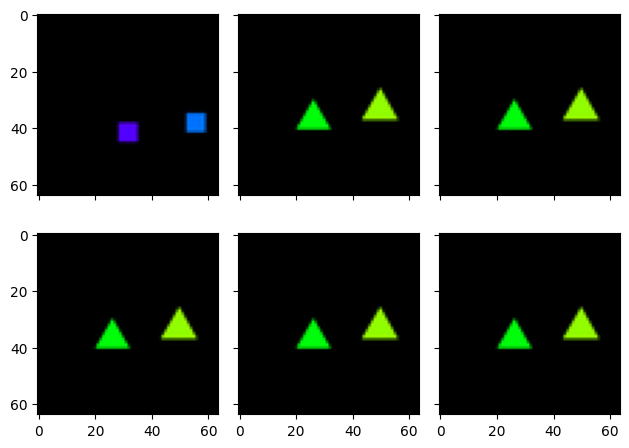

In [12]:
from src.datasets import configs, data

from notebooks.utils.plotting_utils import plot_random_dataset_images

default_cfg = configs.SpriteWorldConfig()
delta = 0.125
sample_mode = "diagonal"
n_slots = 2
n_samples = 2
no_overlap = True
diagonal_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode, 
                                            no_overlap=no_overlap,
                                            delta=delta)

plot_random_dataset_images(diagonal_dataset)


In [ ]:
model.